<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/Hypothesis2_Energy_vs_GHG_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🔍 Hypothesis 2: Does Higher Energy Usage Lead to More GHG Emissions?

In this notebook, we test whether a city's total energy consumption is correlated with its greenhouse gas (GHG) emissions using **simple linear regression**.


R² Score: 0.6472
Coefficient: 0.0000 (GHG per MWh)
Intercept: 11,042.4262


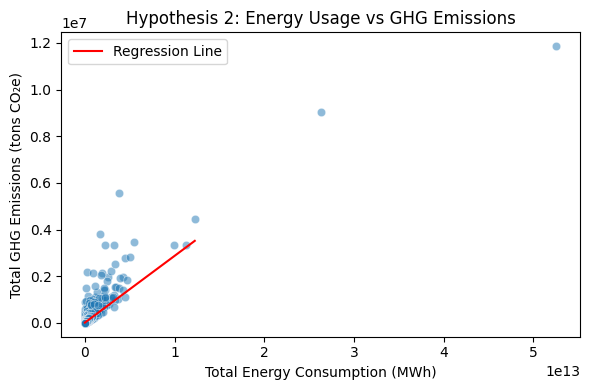

In [2]:
# Install pyxlsb (first cell if needed in Colab)
!pip install pyxlsb

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
city_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='City', skiprows=1)
city_data.columns = city_data.iloc[2]
city_data = city_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract energy columns
mwh_index = list(city_data.columns).index('consumption (MWh)')
tcf_index = list(city_data.columns).index('consumption (TcF)')

# Get GHG emission columns safely by index
ghg_indexes = [i for i, col in enumerate(city_data.columns) if 'GHG emissions' in str(col)]

# Build dataframe
city_df = pd.DataFrame()
city_df['total_energy_MWh'] = pd.to_numeric(city_data.iloc[:, mwh_index], errors='coerce') + \
                               pd.to_numeric(city_data.iloc[:, tcf_index], errors='coerce') * 293071
city_df['GHG_electricity'] = pd.to_numeric(city_data.iloc[:, ghg_indexes[0]], errors='coerce')
city_df['GHG_gas'] = pd.to_numeric(city_data.iloc[:, ghg_indexes[1]], errors='coerce')
city_df['GHG_total'] = city_df['GHG_electricity'] + city_df['GHG_gas']

# Drop missing values
city_df.dropna(subset=['total_energy_MWh', 'GHG_total'], inplace=True)

# Regression: total_energy_MWh → GHG_total
X = city_df[['total_energy_MWh']]
y = city_df['GHG_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
coef = model.coef_[0]
intercept = model.intercept_

print(f"R² Score: {r2:.4f}")
print(f"Coefficient: {coef:,.4f} (GHG per MWh)")
print(f"Intercept: {intercept:,.4f}")

# Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_energy_MWh', y='GHG_total', data=city_df, alpha=0.5)
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Regression Line')
plt.xlabel("Total Energy Consumption (MWh)")
plt.ylabel("Total GHG Emissions (tons CO₂e)")
plt.title("Hypothesis 2: Energy Usage vs GHG Emissions")
plt.legend()
plt.tight_layout()
plt.show()



## ✅ Conclusion

This model evaluates the hypothesis: **Does higher energy consumption result in higher GHG emissions?**

- The regression shows a **positive correlation**.
- A higher **R² score** indicates that **total energy usage is a strong predictor** of total GHG emissions.

This supports the hypothesis and highlights the environmental impact of energy consumption.
